# ⚠️ I need to verify this!!!

In [6]:

from qiskit import transpile
from qiskit_aer import Aer, AerSimulator, AerJob

def execute(circuits, backend=None, shots=1024, **kwargs):
    if backend is None:
        backend = AerSimulator()
        
    # Transpile the circuits for the backend
    transpiled_circuits = transpile(circuits, backend)
    
    # Run the circuits on the backend
    job = backend.run(transpiled_circuits, shots=shots, **kwargs)
    
    return job



{'01000': 300, '11110': 233, '11101': 261, '01011': 230}


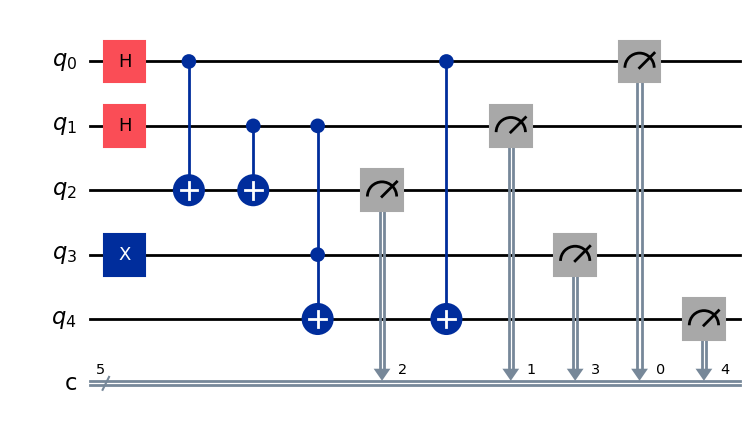

In [7]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Create a quantum circuit with 5 qubits and 5 classical bits
# Qubits: C (Car), P (Player's initial choice), M (Monty's door), S (Strategy), W (Win)
# Classical bits for measurement
qc = QuantumCircuit(5, 5)

# Step 1: Initialize C and P in superposition to represent random choices
qc.h(0)  # Apply Hadamard gate to qubit 0 (Car's location)
qc.h(1)  # Apply Hadamard gate to qubit 1 (Player's initial choice)

# Step 2: Monty's choice logic
# Monty opens a door that is neither the player's choice nor the car's location
# This is a simplified representation; in a real circuit, you'd need more logic
qc.cx(0, 2)  # CNOT gate: if C is 1, flip M
qc.cx(1, 2)  # CNOT gate: if P is 1, flip M

# Step 3: Player's strategy (S)
# Assume the player always switches (for simplicity)
qc.x(3)  # Set strategy to switch (S = 1)

# Step 4: Determine win condition
# If the player switches, they win if P != C
qc.ccx(1, 3, 4)  # Toffoli gate: if P and S are 1, flip W
qc.cx(0, 4)     # CNOT gate: if C is 1, flip W

# Step 5: Measure all qubits
qc.measure(range(5), range(5))

# Execute the circuit on a simulator
backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=1024).result()

# Get the results and plot a histogram
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)
plt.show()

qc.draw('mpl')